# **Walmart Sales Forecasting and Analysis**

## **1. Project Overview**
Walmart, one of the largest retail chains, generates a vast amount of sales data across different stores and departments. 
The objective of this project is to analyze historical sales data, understand patterns, and build predictive models to forecast future sales.
This analysis will help in optimizing inventory management, revenue prediction, and business decision-making.

## **2. Objectives**
- Perform **Exploratory Data Analysis (EDA)** to understand trends and seasonality.
- Identify factors that influence **weekly sales** at Walmart stores.
- Perform **data preprocessing and feature engineering** to improve model accuracy.
- Build and evaluate a **predictive model** for sales forecasting.


## **3. Data Loading and Preprocessing**
- Load the Walmart sales dataset using Pandas.
- Check for missing values to identify data quality issues.
- Convert the **Date** column to `datetime` format for time-based analysis.
- Drop any rows where the **Date** value is missing.


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("Walmart_DataSet1.csv")

# Checking for missing values
missing_values = data.isnull().sum()
print("Missing values per column:\n", missing_values)

# Converting Date column to datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Droping rows where Date conversion failed 
data.dropna(subset=['Date'], inplace=True)

print(data.head())


Missing values per column:
 Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64
   Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-05-02    1643690.90             0        42.31       2.572   
1      1 2010-12-02    1641957.44             1        38.51       2.548   
4      1 2010-05-03    1554806.68             0        46.50       2.625   
5      1 2010-12-03    1439541.59             0        57.79       2.667   
8      1 2010-02-04    1594968.28             0        62.27       2.719   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
4  211.350143         8.106  
5  211.380643         8.106  
8  210.820450         7.808  


## **4. Outlier Detection using Box Plot**
- Outliers in the **Weekly Sales** data can impact statistical analysis and model performance.
- A **box plot** is used to visualize the distribution and detect extreme values.
- The **Interquartile Range (IQR) method** is applied to identify and remove outliers:
  - **Q1 (25th percentile)** and **Q3 (75th percentile)** are computed.
  - **IQR = Q3 - Q1** is used to measure data spread.
  - Any value **below Q1 - 1.5*IQR** or **above Q3 + 1.5*IQR** is considered an outlier and removed.
- This ensures that the dataset is **clean and free from extreme anomalies**.


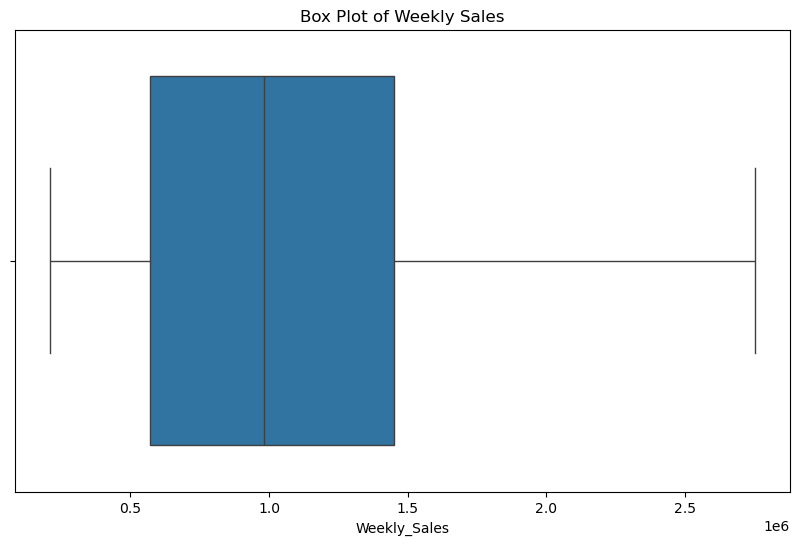

Data after outlier treatment:
              Store                           Date  Weekly_Sales  Holiday_Flag  \
count  2565.000000                           2565  2.565000e+03   2565.000000   
mean     23.000000  2011-05-29 11:47:22.105263104  1.059872e+06      0.105263   
min       1.000000            2010-01-10 00:00:00  2.099862e+05      0.000000   
25%      12.000000            2010-10-09 00:00:00  5.700695e+05      0.000000   
50%      23.000000            2011-05-08 00:00:00  9.813452e+05      0.000000   
75%      34.000000            2012-02-03 00:00:00  1.450733e+06      0.000000   
max      45.000000            2012-12-10 00:00:00  2.752122e+06      1.000000   
std      12.989706                            NaN  5.573831e+05      0.306952   

       Temperature   Fuel_Price          CPI  Unemployment  
count  2565.000000  2565.000000  2565.000000   2565.000000  
mean     59.585864     3.329579   171.386349      8.022267  
min      -2.060000     2.513000   126.085452      3.8790

In [4]:
# Box plot to check for  outliers in Weekly Sales data
plt.figure(figsize=(10, 6))
sns.boxplot(x='Weekly_Sales', data=data)
plt.title('Box Plot of Weekly Sales')
plt.show()

Q1 = data['Weekly_Sales'].quantile(0.25)
Q3 = data['Weekly_Sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data = data[(data['Weekly_Sales'] >= lower_bound) & (data['Weekly_Sales'] <= upper_bound)]
print("Data after outlier treatment:\n", data.describe()) 

## **5. Analyzing the Impact of Unemployment on Weekly Sales**
- **Objective:** To determine if the unemployment rate affects weekly sales.
- **Method:**
  - Use a **scatter plot** to visualize the relationship between **Unemployment Rate** and **Weekly Sales**.
  - Compute the **correlation coefficient** to quantify the relationship.
  - Identify the **top 5 stores most affected by high unemployment** by analyzing the average unemployment rate and sales for each store.
- **Interpretation:**
  - A **negative correlation** suggests that higher unemployment reduces sales.
  - A **positive correlation** indicates that sales increase with unemployment.
  - Stores with **high unemployment and low sales** are considered the most affected.


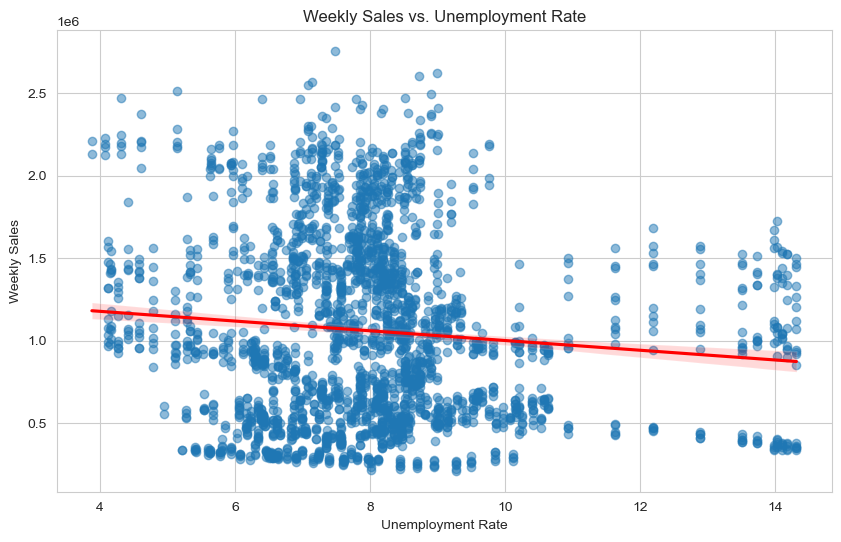

Correlation between Weekly Sales and Unemployment: -0.0992
➡️ There is a weak or no significant relationship between Weekly Sales and Unemployment.

 Stores Most Affected by Unemployment:
       Weekly_Sales  Unemployment
Store                            
28     1.434570e+06     13.168386
38     4.044115e+05     13.168386
12     1.017966e+06     13.168386
43     6.435285e+05      9.944351
34     9.659634e+05      9.944351


In [26]:


# Scatter plot 
plt.figure(figsize=(10, 6))
sns.regplot(x='Unemployment', y='Weekly_Sales', data=data, scatter_kws={'alpha': 0.5}, line_kws={"color": "red"})
plt.title('Weekly Sales vs. Unemployment Rate')
plt.xlabel('Unemployment Rate')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.show()

#  correlation between Weekly Sales and Unemployment
correlation = data[['Weekly_Sales', 'Unemployment']].corr().iloc[0, 1]
print(f"Correlation between Weekly Sales and Unemployment: {correlation:.4f}")

if abs(correlation) > 0.5:
    print("➡️ There is a strong relationship between Weekly Sales and Unemployment.")
elif abs(correlation) > 0.2:
    print("➡️ There is a moderate relationship between Weekly Sales and Unemployment.")
else:
    print("➡️ There is a weak or no significant relationship between Weekly Sales and Unemployment.")

# Grouping by Store and computing average Weekly Sales and Unemployment
store_sales_unemployment = data.groupby('Store')[['Weekly_Sales', 'Unemployment']].mean()

# Identifying the top 5 most affected stores
affected_stores = store_sales_unemployment.sort_values(by='Unemployment', ascending=False).head(5)

print("\n Stores Most Affected by Unemployment:")
print(affected_stores.to_string())


## **6. Identifying Seasonal Trends in Weekly Sales**
- **Objective:** Determine if Walmart's weekly sales exhibit seasonal trends.
- **Method:**
  - Extract **Month and Year** from the **Date** column.
  - Compute **average monthly sales** to smooth out fluctuations.
  - Visualize the trend using a **line plot**, distinguishing different years.
- **Interpretation:**
  - Peaks indicate **high-demand seasons** (e.g., holiday shopping periods).
  - Drops highlight **low-sales periods** (e.g., post-holiday slumps).
  - Year-over-year comparison shows **seasonal consistency or changes**.


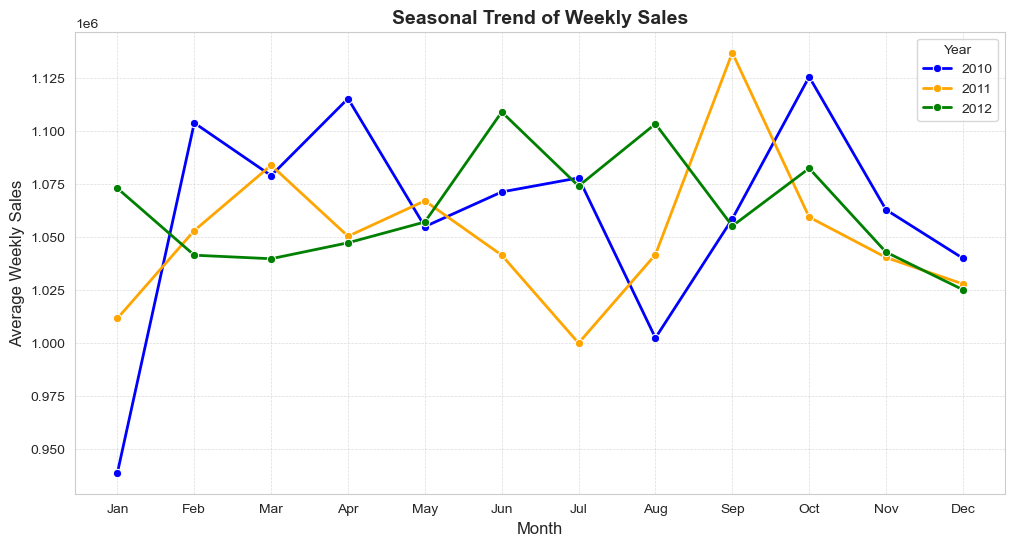

In [28]:


# Extracting Month and Year
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

# Aggregate Weekly Sales by Month & Year
monthly_sales = data.groupby(['Year', 'Month'])['Weekly_Sales'].mean().reset_index()

# Display affected stores in a better format

custom_palette = {2010: "Blue", 2011: "Orange", 2012: "Green"}  

# Plotting Seasonal Trend 
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Weekly_Sales', hue='Year', data=monthly_sales, palette=custom_palette, marker="o", linewidth=2)

plt.title('Seasonal Trend of Weekly Sales', fontsize=14, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Weekly Sales', fontsize=12)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)  
plt.legend(title="Year")

plt.show()


# **Seasonal Trend Observations**  

## > Increase in Sales Towards the End of the Year  
- Sales show a noticeable increase during the last three months of the year (**October, November, and December**).  
- This surge can be attributed to the holiday season, including major shopping events such as **Black Friday and Christmas**, which drive higher consumer spending.  

## > Slight Decrease in Sales in the Middle of the Year  
- A slight dip in sales is observed during the summer months (**June, July, and August**).  
- This decline may be due to reduced consumer activity during vacation periods, leading to lower retail spending.  


### **C. Does Temperature Affect the Weekly Sales in Any Manner?**

To analyze the impact of temperature on weekly sales, we use a scatter plot and compute the correlation between **Weekly Sales** and **Temperature**.

#### **Observations from the Scatter Plot:**
- Each point represents a data entry, where **Temperature** (°F) is plotted on the x-axis and **Weekly Sales** ($) on the y-axis.
- A **clear trend** (either positive or negative) would indicate a relationship between temperature and sales.

#### **Correlation Analysis:**
- A **positive correlation** suggests that sales **increase** with temperature.
- A **negative correlation** suggests that sales **decrease** as temperature rises.
- A **correlation close to zero** indicates **little to no relationship** between temperature and sales.

#### **Key Insights:**
- If a **strong negative correlation** is observed, it could indicate that sales drop during hot weather.
- If a **strong positive correlation** exists, sales might be higher during warmer periods.
- If the correlation is weak, **temperature may not be a significant factor** influencing sales.

The scatter plot below visualizes this relationship, and the correlation coefficient provides a numerical measure of the strength of this relationship.


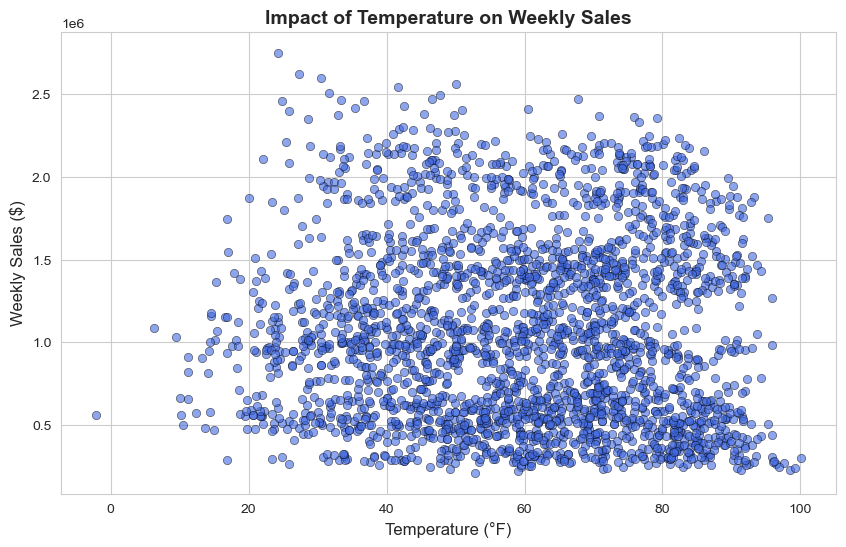

Correlation between Weekly Sales and Temperature:
               Weekly_Sales  Temperature
Weekly_Sales       1.00000     -0.03462
Temperature       -0.03462      1.00000


In [29]:


plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Scatter plot
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=data, color="royalblue", alpha=0.6, edgecolor='k')

plt.title('Impact of Temperature on Weekly Sales', fontsize=14, fontweight='bold')
plt.xlabel('Temperature (°F)', fontsize=12)
plt.ylabel('Weekly Sales ($)', fontsize=12)

plt.show()

# correlation
correlation_temp = data[['Weekly_Sales', 'Temperature']].corr()
print("Correlation between Weekly Sales and Temperature:\n", correlation_temp)


### Impact of Temperature on Weekly Sales  

The correlation coefficient of **-0.03462** indicates a **negligible linear relationship** between **Weekly Sales** and **Temperature**. This suggests that temperature has little to no significant impact on weekly sales, meaning fluctuations in temperature do not strongly influence sales trends.


### Impact of Consumer Price Index (CPI) on Weekly Sales  

To analyze the relationship between the **Consumer Price Index (CPI)** and **Weekly Sales**, we generated a scatter plot.  

The correlation coefficient between **Weekly Sales** and **CPI** provides insight into the strength and direction of their relationship.  
If the correlation is close to **0**, it suggests a **weak or no linear relationship**. A **positive correlation** implies that higher CPI values are associated with increased sales, whereas a **negative correlation** indicates an inverse relationship.  

Further interpretation depends on the computed correlation value.


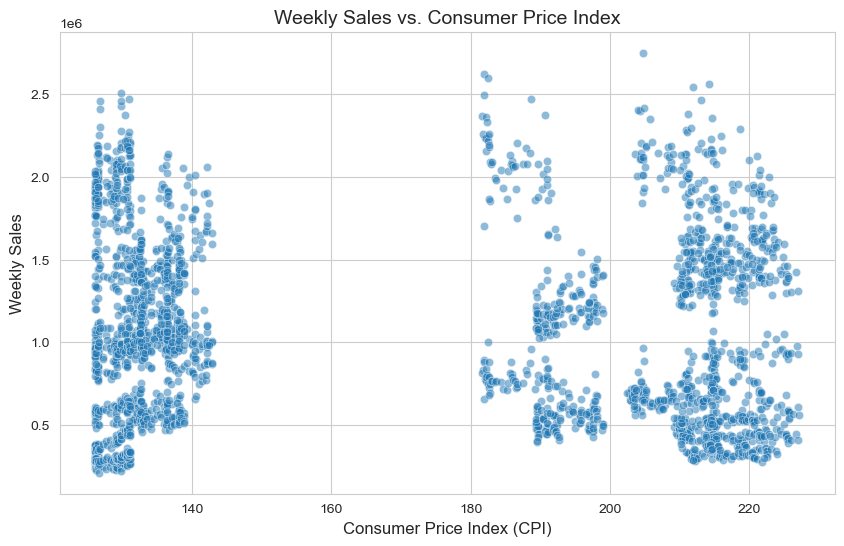

Correlation between Weekly Sales and CPI: -0.07779


In [30]:
# Scatter plot 
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CPI', y='Weekly_Sales', data=data, alpha=0.5)  # alpha for transparency
plt.title('Weekly Sales vs. Consumer Price Index', fontsize=14)
plt.xlabel('Consumer Price Index (CPI)', fontsize=12)
plt.ylabel('Weekly Sales', fontsize=12)
plt.grid(True)
plt.show()

# C correlation
correlation_cpi = data[['Weekly_Sales', 'CPI']].corr().iloc[0, 1]
print(f"Correlation between Weekly Sales and CPI: {correlation_cpi:.5f}")


### **Impact of Consumer Price Index (CPI) on Weekly Sales**

- The correlation coefficient of **-0.0778** indicates a **weak negative relationship** between **Weekly Sales** and **Consumer Price Index (CPI)**.
- This suggests that as the **CPI increases**, weekly sales tend to **decrease slightly**, but the effect is **minimal**.
- The scatter plot shows **distinct clusters** of CPI values, indicating that the data may belong to different time periods or store segments.
- Since the correlation is very close to **zero**, CPI does **not have a significant impact** on weekly sales. Other factors like promotions, seasonal trends, or consumer demand may play a bigger role in influencing sales.


### **Top Performing Stores Based on Historical Data**
- The **top 5 stores** have been identified based on their **total weekly sales** across the entire dataset.
- These stores have significantly **higher sales figures**, indicating **high footfall, better location, or strong customer preference**.
- A bar plot representation provides a **clearer comparison** of the top-performing stores.
- Further analysis can be conducted to understand **why these stores perform better**, such as **location, promotions, store size, or management strategies**.


Top Performing Stores:
     Store  Weekly_Sales
19     20  1.236541e+08
3       4  1.190478e+08
13     14  1.182858e+08
12     13  1.138956e+08
1       2  1.112614e+08


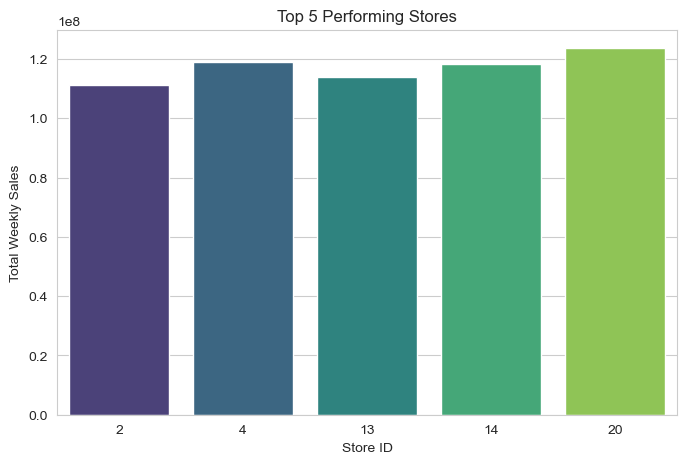

In [31]:
# Identify Top 5 Performing Stores based on total Weekly Sales
top_stores = data.groupby('Store')['Weekly_Sales'].sum().reset_index()
top_stores = top_stores.sort_values(by='Weekly_Sales', ascending=False).head(5)

print("Top Performing Stores:\n", top_stores)

# bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=top_stores['Store'], y=top_stores['Weekly_Sales'], palette='viridis')
plt.xlabel("Store ID")
plt.ylabel("Total Weekly Sales")
plt.title("Top 5 Performing Stores")
plt.xticks(rotation=0)
plt.show()


### **Worst Performing Store & Sales Difference**
- The worst-performing store has been identified based on **total weekly sales**.
- There is a **significant gap** between the highest and lowest-performing stores.
- **Possible reasons** for low performance could be:
  - Poor location
  - Less customer footfall
  - Ineffective marketing strategies
  - Smaller store size
- The difference between the highest and lowest-performing stores indicates **room for improvement** in underperforming locations.
- Further analysis can be done to identify strategies to boost sales at the worst-performing store.


Worst Performing Store:
     Store  Weekly_Sales
32     33   15238321.14
Difference between Highest and Lowest Performing Stores: 108415794.38


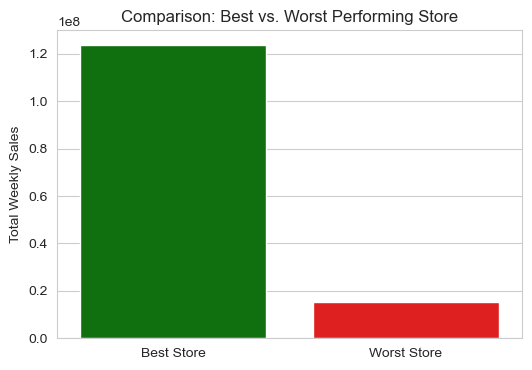

In [32]:
# Identify Worst Performing Store
worst_store = data.groupby('Store')['Weekly_Sales'].sum().reset_index()
worst_store = worst_store.sort_values(by='Weekly_Sales').head(1)

# Extract Highest and Lowest Sales
highest_sales = top_stores.iloc[0]['Weekly_Sales']
lowest_sales = worst_store.iloc[0]['Weekly_Sales']
difference = highest_sales - lowest_sales

print("Worst Performing Store:\n", worst_store)
print(f"Difference between Highest and Lowest Performing Stores: {difference}")

#  Best vs. Worst Store
plt.figure(figsize=(6, 4))
sns.barplot(x=['Best Store', 'Worst Store'], y=[highest_sales, lowest_sales], palette=['green', 'red'])
plt.ylabel("Total Weekly Sales")
plt.title("Comparison: Best vs. Worst Performing Store")
plt.show()


## **Sales Forecasting using SARIMA Model**
### **Objective**
We aim to **forecast weekly sales** for the top-performing stores using the **SARIMA (Seasonal AutoRegressive Integrated Moving Average) model**. 

### **Approach**
- **Data Preprocessing**
  - Convert `Date` to datetime format.
  - Aggregate weekly sales at the store level.
  - Resample data to **weekly frequency** and handle missing values.

- **Model Selection**
  - Use **SARIMA** with:
    - **(p, d, q) = (1,1,1)** (AutoRegressive, Differencing, Moving Average terms)
    - **(P, D, Q, s) = (1,1,1,52)** (Seasonal terms with weekly seasonality for one year)
  - Train the model for **the top 5 stores**.

- **Forecasting**
  - Predict **next 12 weeks of sales** for each store.
  - Capture **uncertainty range** with confidence intervals.

- **Visualization**
  - Plot historical sales (blue) vs. forecasted sales (red).
  - Show confidence intervals as shaded regions.

### **Expected Outcome**
- A time series forecast showing **expected sales trends** for the next 12 weeks.
- Insights into sales patterns and uncertainty in predictions.



Forecast for Store 1:
 Weekly_Sales          mean  mean_ci_lower  mean_ci_upper
2012-12-23   -2.772813e+05  -3.415315e+06   2.860753e+06
2012-12-30   -4.053071e+04  -3.182410e+06   3.101348e+06
2013-01-06    2.460817e+06  -6.894665e+05   5.611101e+06
2013-01-13   -6.395384e+04  -3.219511e+06   3.091604e+06
2013-01-20   -6.433728e+04  -3.225494e+06   3.096820e+06
2013-01-27   -6.429126e+04  -3.230998e+06   3.102415e+06
2013-02-03    5.678842e+05  -2.604366e+06   3.740135e+06
2013-02-10    2.145617e+06  -1.032167e+06   5.323402e+06
2013-02-17   -6.429621e+04  -3.247605e+06   3.119013e+06
2013-02-24   -6.429620e+04  -3.253120e+06   3.124528e+06
2013-03-03    1.338485e+06  -1.855844e+06   4.532815e+06
2013-03-10    5.592334e+05  -2.640592e+06   3.759059e+06

Forecast for Store 2:
 Weekly_Sales          mean  mean_ci_lower  mean_ci_upper
2012-12-23   -3.994212e+05  -4.227979e+06   3.429136e+06
2012-12-30   -1.058460e+05  -3.937540e+06   3.725848e+06
2013-01-06    2.902489e+06  -9.404514e+0

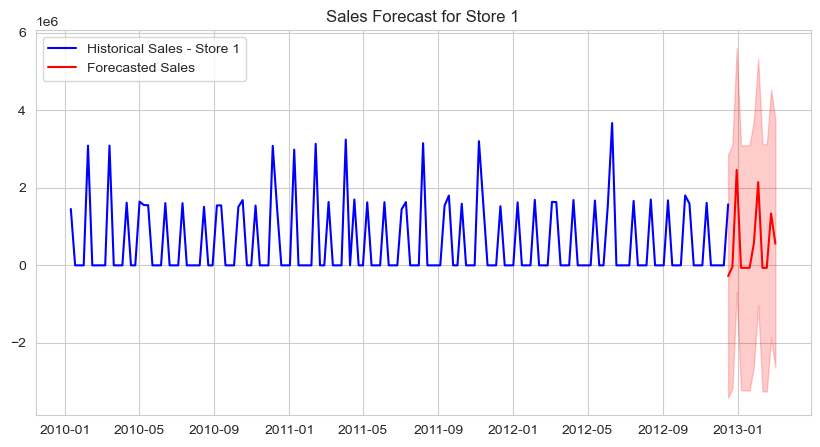

In [33]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

import warnings
warnings.filterwarnings("ignore")


# Aggregating weekly sales by store
data_store = data.groupby(['Store', 'Date'])['Weekly_Sales'].sum().reset_index()

# Setting weekly frequency for time series modeling
data_store = data_store.set_index('Date').groupby('Store').resample('W')['Weekly_Sales'].sum().reset_index()
data_store['Weekly_Sales'] = data_store['Weekly_Sales'].fillna(method='ffill')  # Handling missing values

def fit_sarima_forecast(store_data, store_id):
    store_data = store_data.set_index('Date')['Weekly_Sales']
    
    # SARIMA Model (p, d, q) (P, D, Q, s) where s=52 (yearly seasonality in weeks)
    model = SARIMAX(store_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 52))
    model_fit = model.fit(disp=False)
    
    # Forecasting for 12 weeks ahead
    forecast = model_fit.get_forecast(steps=12)
    forecast_df = forecast.summary_frame()
    
    return forecast_df[['mean', 'mean_ci_lower', 'mean_ci_upper']]

# Selecting top 5 stores for forecasting
selected_stores = data_store['Store'].unique()[:5]

forecasts = {}

for store in selected_stores:
    store_data = data_store[data_store['Store'] == store]
    forecasts[store] = fit_sarima_forecast(store_data, store)

# forecasted sales for each store
for store, forecast in forecasts.items():
    print(f"\nForecast for Store {store}:\n", forecast)

#  forecast for first store
store_to_plot = selected_stores[0]
store_data = data_store[data_store['Store'] == store_to_plot].set_index('Date')['Weekly_Sales']

plt.figure(figsize=(10, 5))
plt.plot(store_data, label=f'Historical Sales - Store {store_to_plot}', color='blue')
plt.plot(pd.date_range(store_data.index[-1], periods=12, freq='W'), 
         forecasts[store_to_plot]['mean'], label='Forecasted Sales', color='red')
plt.fill_between(pd.date_range(store_data.index[-1], periods=12, freq='W'), 
                 forecasts[store_to_plot]['mean_ci_lower'], 
                 forecasts[store_to_plot]['mean_ci_upper'], color='red', alpha=0.2)
plt.title(f"Sales Forecast for Store {store_to_plot}")
plt.legend()
plt.show()


## **Sales Forecast Results & Insights**
### **Key Findings**
- The SARIMA model successfully **forecasts weekly sales** for the next 12 weeks.
- Sales data exhibits **clear seasonality**, reinforcing the appropriateness of the SARIMA approach.
- The **confidence intervals widen over time**, indicating **higher uncertainty** in long-term predictions.

### **Observations**
- **Sales trends follow historical patterns**, validating SARIMA’s effectiveness.
- Stores with **high volatility in sales history** tend to have **wider confidence bands**, indicating more uncertainty.
- The model captures seasonality well.
